##  Task - 01 : Prediction Using Supervised ML

### Predict the percentage of an student based on the no. of study hours.   What will be predicted score if a          student studies for 9.25 hrs/ day?

### 1. Importing the required libraries and dependicies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
import sklearn as sk
sn.set() #this function overrides matplotlib graphis and makes our graph look prettier

### 2. Accessing the given data by using the URL.

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("The given data is as follows: -->")
data.head(5)

The given data is as follows: -->


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 3. Describing the Data

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 4. Ploting a graph for seeing the pattern between hours of study and score obtained

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


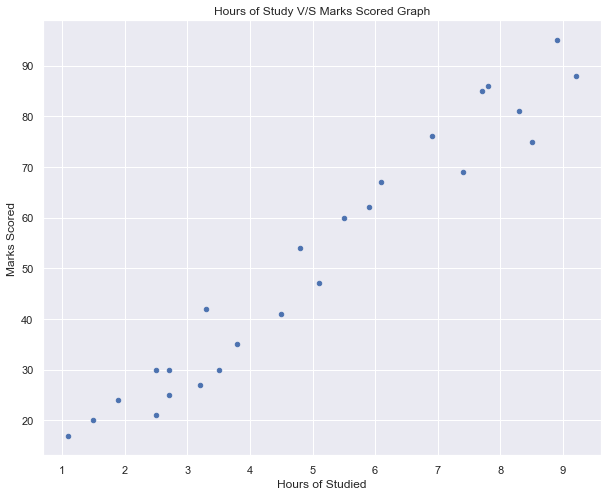

In [4]:
data.plot(x='Hours', y='Scores', kind='scatter', figsize=(10,8))
plt.title('Hours of Study V/S Marks Scored Graph')  
plt.xlabel('Hours of Studied')  
plt.ylabel('Marks Scored')  
plt.show()

### 5. Defining the Regression Equation

In [5]:
x = data["Hours"] #independant variable
y = data["Scores"] #independant variable

### 6. Exploring the Data

In [6]:
X1 = sm.add_constant(x)
result = sm.OLS(y,X1).fit() #output of Ordinary Lease Squares(OLS) regression
result.summary() #displays the regression result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           9.13e-17
Time:                        22:18:16   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. Ploting the graph with regression line

Text(0.5, 1.0, 'SAT Scores Predictions ')

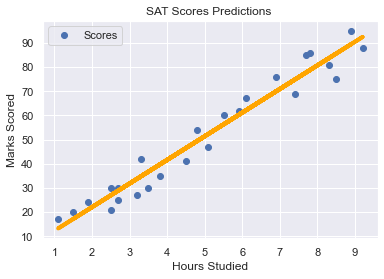

In [7]:
data.plot(x='Hours' , y='Scores' , style='o')
yht = 2.4837 + 9.7758 * x
plt.plot(x,yht,lw=4, color ='orange', label='regression line')
plt.ylabel("Marks Scored")
plt.xlabel("Hours Studied")
plt.title("SAT Scores Predictions ")

### 8. Dividing the data into "attributes" & "labels".

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

### 9. Spliting this data into training and test sets. 

In [9]:
from sklearn.model_selection import train_test_split
xtrn, xtst, ytrn, ytst = train_test_split(X, y, test_size=0.2, random_state=0)

### 10. Training the model

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(xtrn, ytrn) 

print("Training is completed.")

Training is completed.


In [11]:
print(xtst) # Testing data - In Hours
y_prediction = regressor.predict(xtst) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### 11. Comparing Actual vs Predicted Value

In [12]:
df = pd.DataFrame({'Actual': ytst, 'Predicted': y_prediction})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### 12. Predicting the Value

In [13]:
# You can also test with your own data
value = x = 9.25
y_pred = 2.4837 + 9.7758 * x
print("No of Hours = {}".format(value))
print("Predicted Score = {}".format(y_pred))

No of Hours = 9.25
Predicted Score = 92.90985


### 13. Evaluating the Error of Model

In [14]:
from sklearn import metrics  
print('Mean Absolute Error for Data -->', metrics.mean_absolute_error(ytst, y_prediction)) 

Mean Absolute Error for Data --> 4.183859899002975
